In [1]:
import pandas as pd
import numpy as np

In [2]:
import src

In [3]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks\\model'

In [4]:
def load_pickle_preprocessed_data(path):
    """
    Load pickled data for modelling.
    
    Input
    =====
    path, str, to fodler where data is located.
    
    Output
    ======
    X_train,dataframe, 
    X_test,dataframe, 
    y_train,dataframe, 
    y_test, dataframe, 
    
    """
    #### load each data file
    X_train = pd.read_pickle(path + 'X_train.pkl')
    X_test = pd.read_pickle(path + 'X_test.pkl')
    y_train = pd.read_pickle(path + 'y_train.pkl')
    y_test = pd.read_pickle(path + 'y_test.pkl')
    
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = load_pickle_preprocessed_data('../../data/processed/D2/')

In [5]:
X_train.shape

(2099, 31)

In [6]:
X_train.head(1)

,EDDAILYage_mean,EDDAILYattendances,EDDAILYadmissions,year,IPDAILYage_mean_elecnonelec,EDDAILYage_75plus,IPDAILYpatients_total,TARGET_prevday,IPDAILYpatients_elec,IPDAILYpatients_nonelec,...,month_10,month_11,month_12,dayofweek_Monday,dayofweek_Tuesday,dayofweek_Wednesday,dayofweek_Thursday,dayofweek_Friday,dayofweek_Saturday,dayofweek_Sunday
0,-0.929484,-0.102922,0.263304,-1.439714,1.053115,0.179602,-2.60968,1.330809,-3.567591,-1.427765,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Lagging features of Target Only

In [7]:
%matplotlib inline

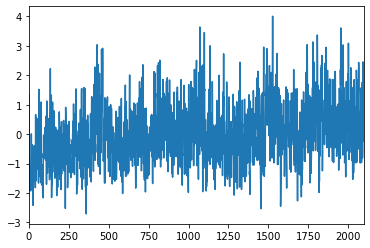

In [8]:
X_train.TARGET_prevday.plot()

In [9]:
X_train.head(2)

,EDDAILYage_mean,EDDAILYattendances,EDDAILYadmissions,year,IPDAILYage_mean_elecnonelec,EDDAILYage_75plus,IPDAILYpatients_total,TARGET_prevday,IPDAILYpatients_elec,IPDAILYpatients_nonelec,...,month_10,month_11,month_12,dayofweek_Monday,dayofweek_Tuesday,dayofweek_Wednesday,dayofweek_Thursday,dayofweek_Friday,dayofweek_Saturday,dayofweek_Sunday
0,-0.929484,-0.102922,0.263304,-1.439714,1.053115,0.179602,-2.60968,1.330809,-3.567591,-1.427765,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.121239,-0.894894,-0.414063,-1.439714,1.091859,-1.490443,-2.36508,-1.023303,-3.567591,-0.906032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X_train.columns

Index(['EDDAILYage_mean', 'EDDAILYattendances', 'EDDAILYadmissions', 'year',
       'IPDAILYage_mean_elecnonelec', 'EDDAILYage_75plus',
       'IPDAILYpatients_total', 'TARGET_prevday', 'IPDAILYpatients_elec',
       'IPDAILYpatients_nonelec', 'IPDAILYage_75plus_elecnonelec',
       'IPDAILYpatients_daycase', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'dayofweek_Monday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday', 'dayofweek_Thursday', 'dayofweek_Friday',
       'dayofweek_Saturday', 'dayofweek_Sunday'],
      dtype='object')

In [11]:
X_train = pd.DataFrame(X_train[['TARGET_prevday',
                                'IPDAILYpatients_total',
                                'EDDAILYage_mean', 
                                'EDDAILYattendances', 
                                'EDDAILYadmissions',
                                'EDDAILYage_75plus',
#                                 'IPDAILYpatients_elec',
                               'IPDAILYpatients_nonelec',
                                'IPDAILYage_75plus_elecnonelec',
#                                'IPDAILYpatients_daycase',
                                
                               'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'dayofweek_Monday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday', 'dayofweek_Thursday', 'dayofweek_Friday',
       'dayofweek_Saturday', 'dayofweek_Sunday',
                               ]])

fundtion for lagged features

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from src.data.preprocess import DataFrameSelector


class LagFeaturesForSelectedVars(BaseEstimator, TransformerMixin):
    """take df and dictionary of which columns to create lagged vas
    dict keys contain column name and values contain list of int (time lags)
    e.g. {'COUNT(EDatt)':[1,3,7,30]}"""

    def __init__(self, col_changes, number_lags):
        self.col_changes = col_changes
        self.number_lags = number_lags
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for col_name in self.col_changes: #loop by columns (keys in dict)
            print(col_name)
            for i in np.arange(1, self.number_lags + 1):
                X[col_name+'_lag'+str(i)] = X[col_name].shift(i)

        return X

            for i in self.col_changes[col_name]: #loop by value in dict correpsonding to key above
                #print(i)
                X[col_name+'_lag'+str(i)] = X[col_name].shift(i) # shift of each column and saving to new column with subscript
                X[col_name+'_sum'+str(i)] = X[col_name].rolling(i).sum()
                X[col_name+'_mean'+str(i)] = X[col_name].rolling(i).mean()

lags_pipeline = Pipeline([
    ('feature_lagger', LagFeaturesForSelectedVars(['TARGET_prevday'], 3)),
    
#     ('feature_filter',SelectKBest(f_classif,k='all')),
#     ('imputer',SimpleImputer(strategy='median')),
#     ('std_scaler',StandardScaler()),
])

#### create list of pipelines to include
pipes_list = [
    ('lags_pipeline',lags_pipeline),
]

full_pipeline = FeatureUnion(transformer_list=pipes_list)


X_trainT = full_pipeline.fit_transform(X_train,y_train)
X_testT = full_pipeline.transform(X_test)

In [12]:
def create_lagged_vars(df, col_name, number_lags):
    ""
    for i in np.arange(1, number_lags + 1):
        df[col_name+'_lag'+str(i)] = df[col_name].shift(i)
    return(df)



no_lags = 4
X_trainT = create_lagged_vars(X_train.copy(), 'TARGET_prevday', no_lags)

X_trainT = create_lagged_vars(X_trainT.copy(), 'IPDAILYpatients_total', no_lags)

X_trainT.fillna(method='bfill', inplace=True)


In [13]:

X_trainT.head()

,TARGET_prevday,IPDAILYpatients_total,EDDAILYage_mean,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_75plus,IPDAILYpatients_nonelec,IPDAILYage_75plus_elecnonelec,month_1,month_2,...,dayofweek_Saturday,dayofweek_Sunday,TARGET_prevday_lag1,TARGET_prevday_lag2,TARGET_prevday_lag3,TARGET_prevday_lag4,IPDAILYpatients_total_lag1,IPDAILYpatients_total_lag2,IPDAILYpatients_total_lag3,IPDAILYpatients_total_lag4
0,1.330809,-2.609680,-0.929484,-0.102922,0.263304,0.179602,-1.427765,-2.008811,1.0,0.0,...,0.0,0.0,1.330809,1.330809,1.330809,1.330809,-2.609680,-2.609680,-2.60968,-2.60968
1,-1.023303,-2.365080,0.121239,-0.894894,-0.414063,-1.490443,-0.906032,-1.698567,1.0,0.0,...,1.0,0.0,1.330809,1.330809,1.330809,1.330809,-2.609680,-2.609680,-2.60968,-2.60968
2,-0.795302,-0.453781,1.505854,-0.718901,-1.204324,0.068266,-0.369806,-1.129788,1.0,0.0,...,0.0,1.0,-1.023303,1.330809,1.330809,1.330809,-2.365080,-2.609680,-2.60968,-2.60968
3,-1.866908,-0.618744,0.261197,-2.830828,-3.067083,-0.933761,-0.485747,-0.948812,1.0,0.0,...,0.0,0.0,-0.795302,-1.023303,1.330809,1.330809,-0.453781,-2.365080,-2.60968,-2.60968
4,-1.901108,-0.106789,3.049384,-2.156184,-1.486560,1.404302,-0.065462,-0.509300,1.0,0.0,...,0.0,0.0,-1.866908,-0.795302,-1.023303,1.330809,-0.618744,-0.453781,-2.36508,-2.60968


#### makeing derivitives

In [14]:
# df['crude'] = 

def make_col_derivative(df, column_name ,deriv_lag):
    """
    Parameters
    ==========
    df, dataframe, 
    column_name, str, name of column
    deriv_lag, int, number of points to lag over
    
    Returns
    =======
    derivative, Series, new derivative column
    """
    new_col_name = column_name + '_deriv' + str(deriv_lag)
    
    #### Make time column in new df
    deriv_df = pd.DataFrame(np.arange(0, len(df)),columns = ['time'], index = df.index)
    
    ####
    deriv_df['X'] = df[column_name]
    crude_deriv = (deriv_df['X'].diff(deriv_lag))/(deriv_df['time'].diff(deriv_lag))
    deriv_df[new_col_name] = crude_deriv
    deriv_df.bfill(inplace=True)
    
    
    derivative = deriv_df[new_col_name]

    return(derivative)

def perform_deriv_cals_multiple_columns(df, columns_dict):
    """
    Calls make_col_derivatives on multiple columns based on user input of dict.
    Parameters
    ==========
    
    """
    #### loop over each column
    for column in columns_dict.keys():
        #### loop over each lag requested
        for deriv_lag in columns_dict[column]:
            new_col_name = column + '_deriv' + str(deriv_lag) # get new name for column
            df[new_col_name] = make_col_derivative(df, column, deriv_lag)
    return(df)

In [15]:
lags_required = {'TARGET_prevday':[1,3,7],
                 'IPDAILYpatients_total':[1,3,7],
                'EDDAILYadmissions':[3,7],
#                  'EDDAILYattendances':[3,7], 
#                 'EDDAILYage_75plus':[3,7],
                
                }
X_trainT = perform_deriv_cals_multiple_columns(X_trainT, lags_required)

In [16]:
X_trainT.head()

,TARGET_prevday,IPDAILYpatients_total,EDDAILYage_mean,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_75plus,IPDAILYpatients_nonelec,IPDAILYage_75plus_elecnonelec,month_1,month_2,...,IPDAILYpatients_total_lag3,IPDAILYpatients_total_lag4,TARGET_prevday_deriv1,TARGET_prevday_deriv3,TARGET_prevday_deriv7,IPDAILYpatients_total_deriv1,IPDAILYpatients_total_deriv3,IPDAILYpatients_total_deriv7,EDDAILYadmissions_deriv3,EDDAILYadmissions_deriv7
0,1.330809,-2.609680,-0.929484,-0.102922,0.263304,0.179602,-1.427765,-2.008811,1.0,0.0,...,-2.60968,-2.60968,-2.354112,-1.065906,-0.379459,0.244601,0.663645,0.104016,-1.110129,-0.137086
1,-1.023303,-2.365080,0.121239,-0.894894,-0.414063,-1.490443,-0.906032,-1.698567,1.0,0.0,...,-2.60968,-2.60968,-2.354112,-1.065906,-0.379459,0.244601,0.663645,0.104016,-1.110129,-0.137086
2,-0.795302,-0.453781,1.505854,-0.718901,-1.204324,0.068266,-0.369806,-1.129788,1.0,0.0,...,-2.60968,-2.60968,0.228001,-1.065906,-0.379459,1.911299,0.663645,0.104016,-1.110129,-0.137086
3,-1.866908,-0.618744,0.261197,-2.830828,-3.067083,-0.933761,-0.485747,-0.948812,1.0,0.0,...,-2.60968,-2.60968,-1.071606,-1.065906,-0.379459,-0.164963,0.663645,0.104016,-1.110129,-0.137086
4,-1.901108,-0.106789,3.049384,-2.156184,-1.486560,1.404302,-0.065462,-0.509300,1.0,0.0,...,-2.36508,-2.60968,-0.034200,-0.292602,-0.379459,0.511955,0.752763,0.104016,-0.357499,-0.137086


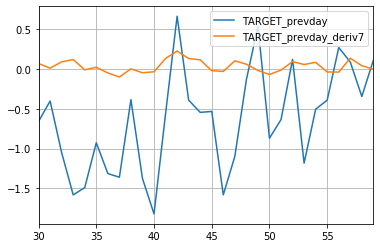

In [17]:
X_trainT[['TARGET_prevday','TARGET_prevday_deriv7']].iloc[30:60].plot(grid=True)

# Run CV gridsearch

In [18]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [19]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

In [20]:
grid = {'C':[0.01, 0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10]}
# grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_trainT,y_train,'CV set')

CV MODEL RESULTS
{'C': 0.01}
   mean_test_score  mean_train_score
0          0.44426          0.487738


In [21]:
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

In [22]:
pd.DataFrame(grid_search.cv_results_).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.00877647,0.00578508,0.00698128,0.0101731,0.00857682,0.010173,0.00917468,0.00977316,0.0115687,0.0159671
std_fit_time,0.00146521,0.00193461,0.00315416,0.0054403,0.0040196,0.00456578,0.00364534,0.00438754,0.00566285,0.00664843
mean_score_time,0.00299172,0.00159535,0.00239372,0.00219426,0.00199547,0.00199471,0.00199523,0.00199528,0.0017962,0.0025835
std_score_time,0.00126101,0.000488795,0.00048813,0.000398709,1.05121e-06,0.000630827,0.000631053,1.19114e-06,0.000745576,0.000499103
param_C,0.01,0.05,0.1,0.2,0.3,0.5,0.7,1,3,10
params,{'C': 0.01},{'C': 0.05},{'C': 0.1},{'C': 0.2},{'C': 0.3},{'C': 0.5},{'C': 0.7},{'C': 1},{'C': 3},{'C': 10}
split0_test_score,0.475676,0.434343,0.432692,0.436893,0.413462,0.413462,0.413462,0.411483,0.411483,0.407767
split1_test_score,0.409756,0.416244,0.427083,0.448087,0.440678,0.453488,0.449704,0.460606,0.459627,0.459627
split2_test_score,0.506024,0.478873,0.49635,0.481203,0.481203,0.469697,0.465116,0.472441,0.456693,0.444444
split3_test_score,0.446512,0.451923,0.464646,0.469388,0.476684,0.476684,0.484211,0.486772,0.489362,0.489362


In [23]:
from src.eval.eval_utils import BinClassEval

# Warning not sure hsould be evaluating like this! should be using cv_prediction!

No handles with labels found to put in legend.


Model has decision_function.
Model has predict_proba.
AUC:  0.825
F1 score:  0.468
accuracy:  0.736


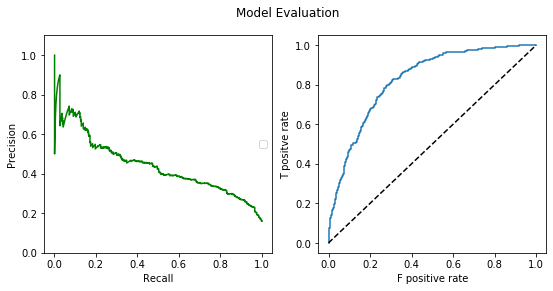

In [24]:
BinClassEval(lgr, X_trainT, y_train, plot=True)

In [13]:
from sklearn.feature_selection import SelectKBest

In [14]:
X = SelectKBest(k=40).fit_transform(X_train, y_train)

In [15]:
grid_search = find_best_model(lgr,grid,X,y_train,'CV set')
lgr_kbest = grid_search.best_estimator_

CV MODEL RESULTS
{'C': 0.5}
   mean_test_score  mean_train_score
4         0.519775          0.628764


No handles with labels found to put in legend.


Model has decision_function.
Model has predict_proba.
AUC:  0.909
F1 score:  0.573
accuracy:  0.81


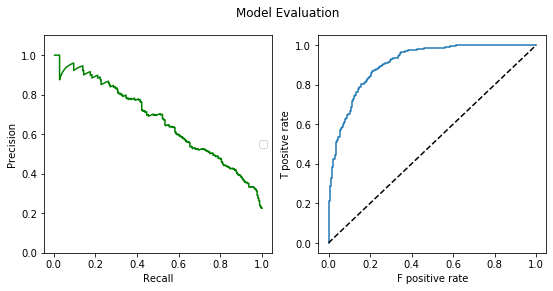

In [16]:
BinClassEval(lgr_kbest, X, y_train, plot=True)

# Logging model and trianing results

Create first log df

model_log = pd.DataFrame(columns=['dataV','model','gridsearch','mean_train','mean_valid','notes'])

model_log

model_log.to_pickle('./../data/output/model_log.pkl')

In [22]:
from src.eval.eval_utils import save_model_to_log

save_model_to_log('./../data/output/model_log.pkl', 'v1', lgr, grid_search, 'Initial model which was built on first edition of data as basline.')

In [35]:
models = pd.read_pickle('./../../data/output/model_log.pkl')

In [36]:
models

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
1,v1,"(DecisionTreeClassifier(class_weight=None, cri...",mean_fit_time std_fit_time mean_score_ti...,[0.685],[0.419],Random Forest 1st attempt with v1.
2,v1,"XGBClassifier(base_score=0.5, booster='gbtree'...",mean_fit_time std_fit_time mean_score_tim...,[0.829],[0.439],V1 attempt with XGBOOST. KFOLD selection of fe...


In [31]:
model = models.iloc[0].model

In [34]:
BinClassEval(model, X_trainT, y_train)

ValueError: X has 43 features per sample; expecting 52

# Reworking of BinClassEval

No handles with labels found to put in legend.


DECISION FUNC CALLED
Model has decision_function.
PREDICT PROBAB CALLED
Model has predict_proba.
AUC:  0.796
F1 score:  0.468
accuracy:  0.736


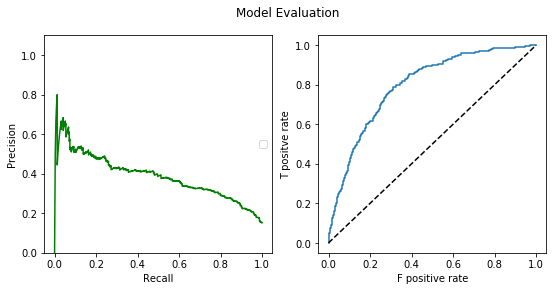

In [25]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, roc_curve, accuracy_score
import matplotlib.pyplot as plt

class BinClassEvalCV():
    """ 
    Makes all evalutation you need to assess binary classifcation models.
    Suggested use for final evaluation once models have been decided. e.g. running on test set. 
    Built for sklearn models: some functionality requires model to have either a predict proba or decision function.
    """
    
    
    def __init__(self, model, X, y, plot_title='Model Evaluation', plot = False):
        """
        Input
        -----
        Model, sklearn model, (that has had .fit() method called aready).
        X, df/numpy array, containing features
        y, df/numpy array, containing binary target
        """
        #### assign inputs
        self.model = model
        self.X = X
        self.y = y
        self.plot_title = plot_title
        
        self.proba_pred_avail = False
        
        self.my_cv = TimeSeriesSplit(n_splits=5).split(X)
        
        #### calc prob and decision functions (where possible). 
        ### NOTE: these are assigned to the same proba_preds attribute. If predict_prob avail then this takes precident.
        if hasattr(model, 'decision_function'):
#             predDF = model.decision_function(X) # warning, some model dont have DF
            print('DECISION FUNC CALLED')
            predDF = cross_val_predict(model, X, y, cv=3, method='predict_proba')
            self.proba_preds = predDF
            self.DF = predDF
            print('Model has decision_function.')
            
        if hasattr(model, 'predict_proba'):
            print('PREDICT PROBAB CALLED')
#             proba_preds = model.predict_proba(X)[:,1]
            
            proba_preds = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:,1]
            self.proba_preds = proba_preds
            self.proba_preds_avail = True
            print('Model has predict_proba.')
            
        self.label_preds = self.model.predict(X)
            
        #### run evaluation
        self.AUC()
        self.F1()
        self.accuracy()
        
        if plot == True:
            self.plot_AUC_PR()
            
        return
    
    def AUC(self):
        "Prints and returns AUC score."
        AUC = roc_auc_score(self.y, self.proba_preds).round(3)
        self.AUC = AUC
        print('AUC: ', AUC) # NOTE: sklearn doc says use prob, if not use decision function.
        return
    
    def F1(self):
        "Prints and returns F1 score."
        F1 = f1_score(self.y, self.label_preds).round(3)
        self.F1 = F1
        print('F1 score: ', F1)
        return
    
    def accuracy(self):
        "Prints and returns accuracy score."
        accuracy = accuracy_score(self.y, self.label_preds).round(3)
        self.accuracy = accuracy
        print('accuracy: ', accuracy)
        return
    
    def confusion_matrix(self):
        "Prints confusion matrix."
        return
    
    def plot_AUC_PR(self):
        "Plots AUC and Precision-Recall plot as one figures."
        
        precisions, recalls, thresholds = precision_recall_curve(self.y, self.proba_preds)

        fpr,tpr,thresholds_ROC = roc_curve(self.y, self.proba_preds)
        
        fig,ax = plt.subplots(1,2,figsize=(9,4))
        fig.suptitle(self.plot_title)
        # prec-recall plot
        ax[0].plot(recalls[:-1],precisions[:-1],'g-') #,label='Reca')
        ax[0].set_ylabel('Precision')
        ax[0].set_xlabel('Recall')
        ax[0].legend(frameon=True,loc='center right')
        ax[0].set_ylim([0,1.1])
        # AUC plot
        ax[1].plot(fpr,tpr)
        ax[1].plot([0,1],[0,1],'k--') # 45def line
        ax[1].set_xlabel('F positive rate')
        ax[1].set_ylabel('T positve rate')
        
        return
    
BinClassEvalCV(lgr, X_trainT, y_train, plot=True)

# Dev: slope calulations

In [52]:
data = {'X':[0,1,2,3,3,2,1,1,5]}
df = pd.DataFrame(data)

In [54]:
slope = pd.Series(np.gradient(df['X'].values), df.index, name='slope')

In [55]:
len(slope)

9

In [56]:
df['numpy'] = slope

In [65]:
df['time'] = df.index

In [79]:
# df['crude'] = 
dir_lag = 3
crude = (df['X'].diff(dir_lag))/(df['time'].diff(dir_lag))

df['crude'] = crude

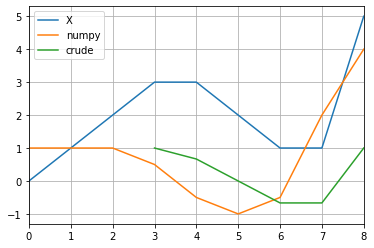

In [80]:
df.drop(['time'],axis=1).plot(grid=True)

In [ ]:
np.gradient()

np.gradient uses time points before an after so no suitable. Can make crude lag using differences from previsou events and dividing by time.